In [1]:
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

data_path = '/dlwpt-code/cifar10'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
%ls

 ��� � ���ன�⢥ D ����� ���� Data
 ��਩�� ����� ⮬�: 74AD-C5FE

 ����ন��� ����� d:\YandexDisk\study\������

01.04.2024  13:29    <DIR>          .
01.04.2024  13:12    <DIR>          ..
01.04.2024  17:57    <DIR>          .idea
26.11.2023  13:34            23�278 _�����_�_��ଫ����_���_�_2023.docx
30.11.2023  12:56           355�255 2_5422657366686448253.pdf
27.10.2023  12:44           454�272 20261024_���ᠭ��_���⥪����_���஡�������᪮�?_���ଠ樮����?.docx
24.03.2024  17:10            79�058 blue.jpg
23.03.2024  17:32           197�331 Bobby.jpg
30.11.2023  12:56         3�260�841 c_����.pdf
25.03.2024  02:54       609�089�184 coco_instance_segmentation_dataset.zip
25.03.2024  02:03    <DIR>          DATASET_BIG
25.03.2024  02:45    <DIR>          DATASET_MINI
29.03.2024  13:59    34�082�461�541 DATASETS.zip
01.04.2024  13:21           640�618 detectron2_learn.ipynb
23.03.2024  14:08             2�485 detectron2_learn.py
23.03.2024  22:08    <DIR>          dlwpt-code
29.03.2024  23:16           259�7

In [78]:
cifar10, cifar10_val

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: /dlwpt-code/cifar10
     Split: Train,
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: /dlwpt-code/cifar10
     Split: Test)

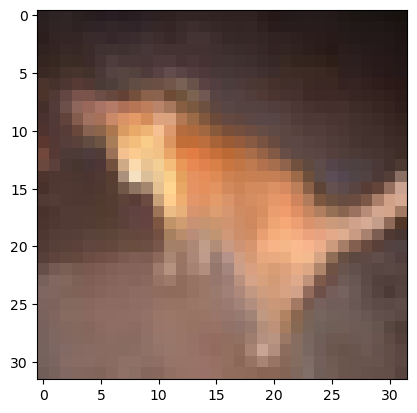

In [79]:
plt.imshow(cifar10[342][0])

In [80]:
type(cifar10[0][0])

PIL.Image.Image

In [81]:
img, label = cifar10[90]
img, label, cifar10.classes[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 2, 'bird')

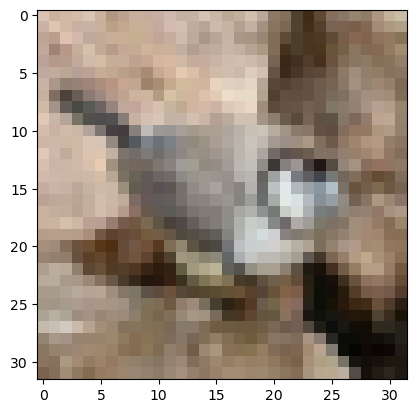

In [82]:
plt.imshow(img)
plt.show()

In [83]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [84]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [85]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
tensor_cifar10[0][0].shape

torch.Size([3, 32, 32])

In [86]:
img_t, _ = tensor_cifar10[99]

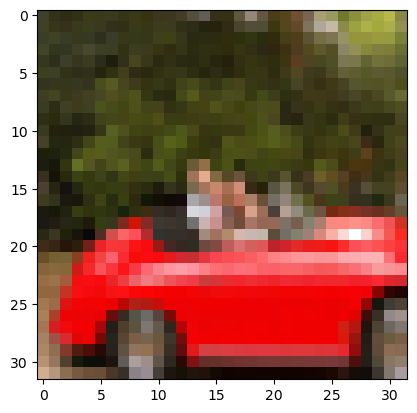

In [87]:
plt.imshow(img_t.permute(1, 2, 0))

In [88]:
type(img_t)

torch.Tensor

In [89]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [90]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

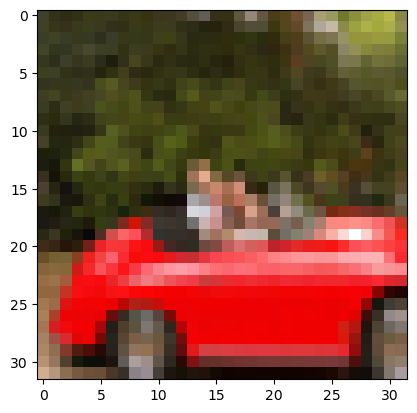

In [91]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [92]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [93]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [105]:
imgs.view(3, -1).shape
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [100]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [106]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [113]:
transformed_cifar10 = datasets.CIFAR10(
    data_path,
    train=True,
    download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
    ])
)
transformed_cifar10_val = datasets.CIFAR10(
    data_path,
    train=False,
    download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
    ])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


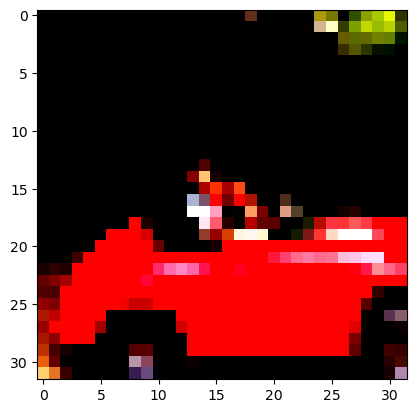

In [114]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [115]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0, 2]]

In [118]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out)
)

In [120]:
model.named_modules

<bound method Module.named_modules of Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=2, bias=True)
)>

In [121]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [127]:
x = torch.tensor([1.0, 2.0, 3.0])

In [133]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [130]:
softmax(x).sum()

tensor(1.)

In [143]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [145]:
x.shape

torch.Size([2, 3])

In [199]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


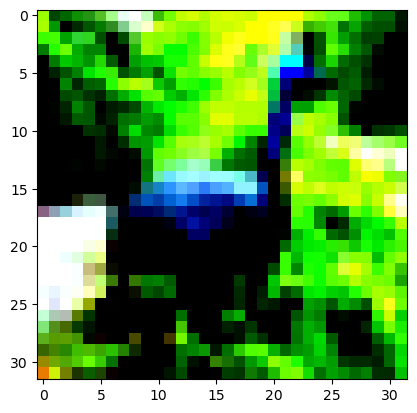

In [200]:
img, label = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [201]:
img_batch = img.view(-1).unsqueeze(0)
img_batch.shape

torch.Size([1, 3072])

In [202]:
out = model(img_batch)
out

tensor([[0.4803, 0.5197]], grad_fn=<SoftmaxBackward0>)

In [203]:
_, index = torch.max(out, dim=1)
index

tensor([1])

In [204]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)

In [205]:
loss = nn.NLLLoss()

In [206]:
img.view(-1).unsqueeze(0).shape

torch.Size([1, 3072])

In [207]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.9096, grad_fn=<NllLossBackward0>)

In [209]:
import time

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)

lr = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.NLLLoss()
n_epochs = 100

for epoch in range(n_epochs):
    start_time = time.time()
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    elapsed = time.time() - start_time
    print(f'Эпоха: {epoch}, \
          Потеря: {float(loss)}, \
          Эпоха заняла времени: {int(elapsed)}с, \
          Оставшееся время: {int(elapsed * (n_epochs - epoch))}с')

Эпоха: 0,           Потеря: 0.4846811890602112,           Эпоха заняла времени: 1с,           Оставшееся время: 118с
Эпоха: 1,           Потеря: 0.5619684457778931,           Эпоха заняла времени: 1с,           Оставшееся время: 116с
Эпоха: 2,           Потеря: 0.3379323184490204,           Эпоха заняла времени: 1с,           Оставшееся время: 111с
Эпоха: 3,           Потеря: 0.6634566187858582,           Эпоха заняла времени: 1с,           Оставшееся время: 116с
Эпоха: 4,           Потеря: 0.27849894762039185,           Эпоха заняла времени: 1с,           Оставшееся время: 113с
Эпоха: 5,           Потеря: 0.5296955108642578,           Эпоха заняла времени: 1с,           Оставшееся время: 109с
Эпоха: 6,           Потеря: 0.3956037163734436,           Эпоха заняла времени: 1с,           Оставшееся время: 104с
Эпоха: 7,           Потеря: 0.34387654066085815,           Эпоха заняла времени: 1с,           Оставшееся время: 106с
Эпоха: 8,           Потеря: 0.4589279294013977,           Эпох

In [231]:
val_loader = torch.utils.data.DataLoader(
    cifar2_val, batch_size=64, shuffle=False)

print('Всего изображений в валидационной выборке:', len(cifar2_val))

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print('Точность: %f процента' % ((correct / total) * 100))

Всего изображений в валидационной выборке: 2000
Точность: 81.150000 процента


Эпоха: 0,           Потеря: 0.5571237802505493,           Точность на валидационной выборке: 0.7745,           Точность на обучающей выборке: 0.7836,           Эпоха заняла времени: 3с,           Оставшееся время: 377с
Эпоха: 1,           Потеря: 0.2617862820625305,           Точность на валидационной выборке: 0.788,           Точность на обучающей выборке: 0.7915,           Эпоха заняла времени: 3с,           Оставшееся время: 355с
Эпоха: 2,           Потеря: 0.34531375765800476,           Точность на валидационной выборке: 0.797,           Точность на обучающей выборке: 0.7989,           Эпоха заняла времени: 3с,           Оставшееся время: 337с
Эпоха: 3,           Потеря: 0.6382802128791809,           Точность на валидационной выборке: 0.806,           Точность на обучающей выборке: 0.8032,           Эпоха заняла времени: 3с,           Оставшееся время: 298с
Эпоха: 4,           Потеря: 0.18762560188770294,           Точность на валидационной выборке: 0.8035,           Точность на об

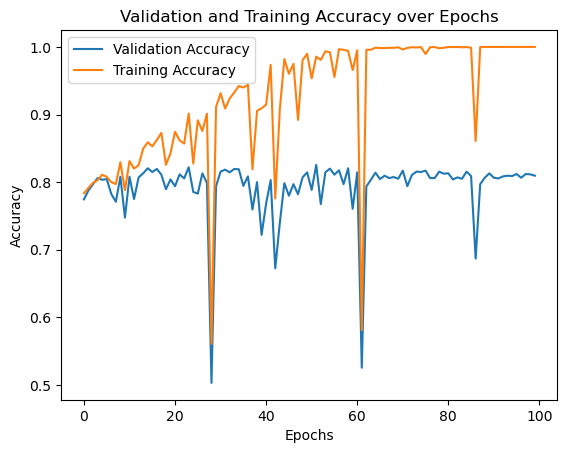

In [276]:
# Мы создали модель, способную связывать каждый из пикселей с любым другим
# пикселем изображения, вне зависимости от их пространственного расположения. 
# Впрочем, мы сделали обоснованное предположение, что расположенные
# ближе друг к другу пиксели теоретически намного сильнее связаны. Это значит,
# что мы обучаем не инвариантный относительно сдвига классификатор, так
# что нам приходится расходовать немало разрешающих возможностей модели
# на усвоение сдвинутых копий изображений, чтобы можно было надеяться на
# хорошие результаты на проверочном наборе данных. Должен же существовать
# способ получше, правда? (стр. 246) PyTorch Освещая глубокое обучение

import time

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

# Переопределение модели (улучшаем разрешающую способность модели)
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, n_out),
    nn.LogSoftmax(dim=1)
)

lr = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.NLLLoss()
n_epochs = 100

epochs = range(n_epochs)
val_accuracy = []
train_accuracy = []

for epoch in epochs:
    start_time = time.time()
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            batch_size = imgs.shape[0]
            outputs = model(imgs.view(batch_size, -1))
            _, predicted = torch.max(outputs, dim=1)
            total += labels.shape[0]
            correct += int((predicted == labels).sum())
    val_accuracy.append(correct / total)

    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labels in train_loader:
            batch_size = imgs.shape[0]
            outputs = model(imgs.view(batch_size, -1))
            _, predicted = torch.max(outputs, dim=1)
            total += labels.shape[0]
            correct += int((predicted == labels).sum())
    train_accuracy.append(correct / total)

    elapsed = time.time() - start_time
    print(f'Эпоха: {epoch}, \
          Потеря: {float(loss)}, \
          Точность на валидационной выборке: {val_accuracy[-1]}, \
          Точность на обучающей выборке: {train_accuracy[-1]}, \
          Эпоха заняла времени: {int(elapsed)}с, \
          Оставшееся время: {int(elapsed * (n_epochs - epoch))}с')

plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation and Training Accuracy over Epochs')
plt.legend()
plt.show()

In [277]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [1]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape

NameError: name 'nn' is not defined